In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 22, 7

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 

In [41]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## All the life cycle in datascience project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployement

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
null_value_features = [feature for feature in df.columns if df[feature].isna().sum()>1]

In [33]:
numeric_features = df.select_dtypes(np.number).columns.tolist()
cat_features = df.select_dtypes('object').columns.tolist()
len(cat_features), len(numeric_features)

(43, 38)

In [34]:
[feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [37]:
discrete = [feature for feature in numeric_features if (len(df[feature].unique()))<15]
df[discrete]

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,8,5,1,0,2,1,4,1,9,1,3,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0,0,2,1,3,1,7,1,2,0,8,2007
1456,6,6,1,0,2,0,3,1,7,2,2,0,2,2010
1457,7,9,0,0,2,0,4,1,9,2,1,0,5,2010
1458,5,6,1,0,1,0,2,1,5,0,1,0,4,2010


In [3]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
cat_features = titanic.select_dtypes('object').columns.tolist()
num_features = titanic.select_dtypes(np.number).columns.tolist()
len(cat_features), len(num_features)

(5, 6)

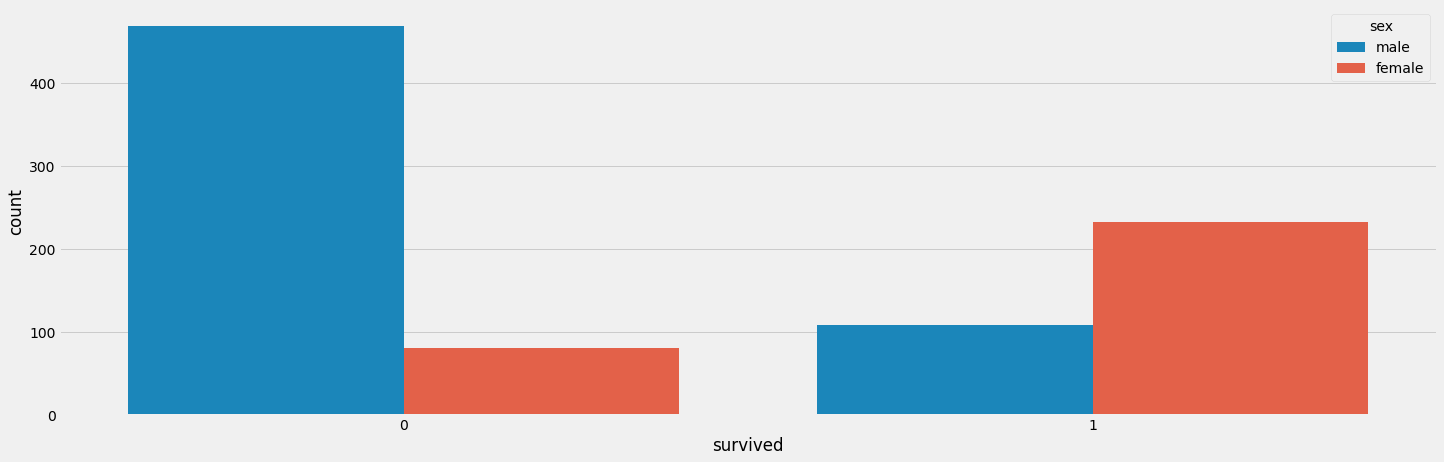

In [22]:
sns.countplot('survived', data=titanic, hue='sex');

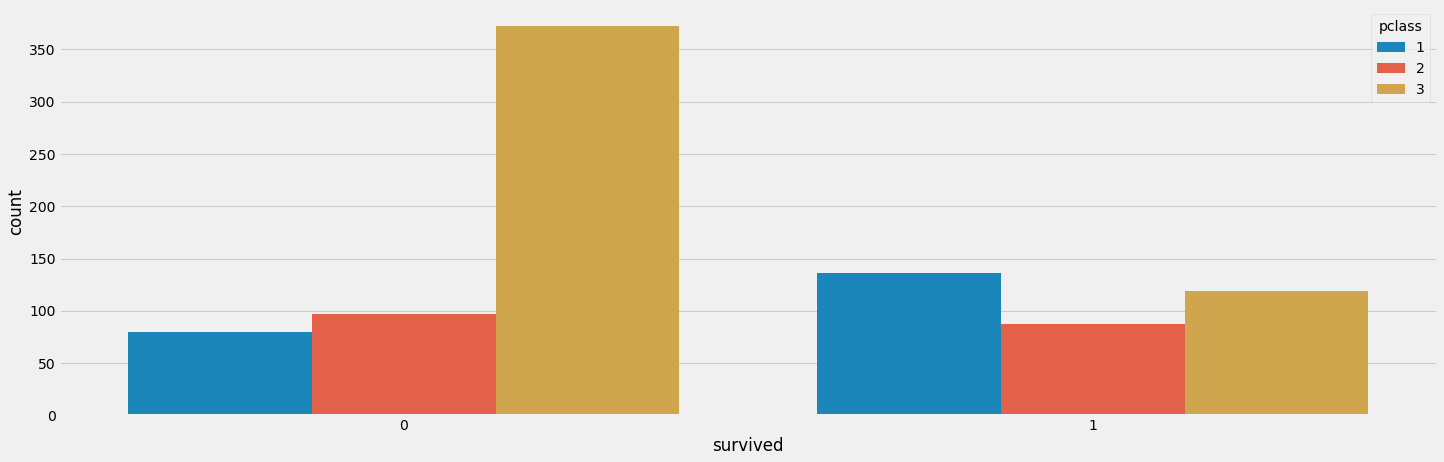

In [23]:
sns.countplot('survived', data=titanic, hue='pclass');

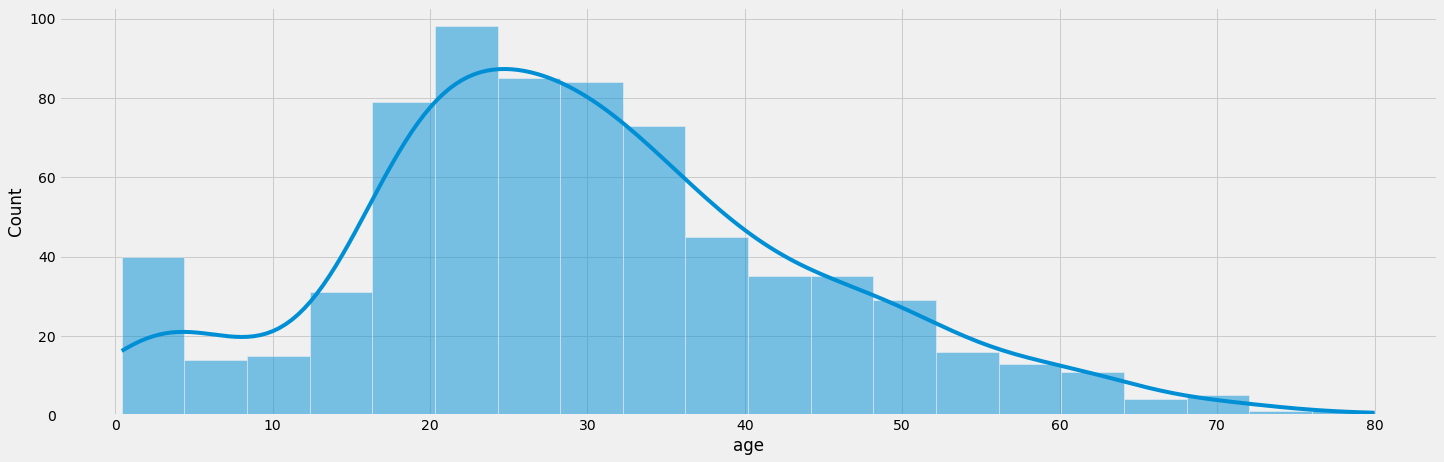

In [24]:
sns.histplot(data=titanic, x='age', kde=True);

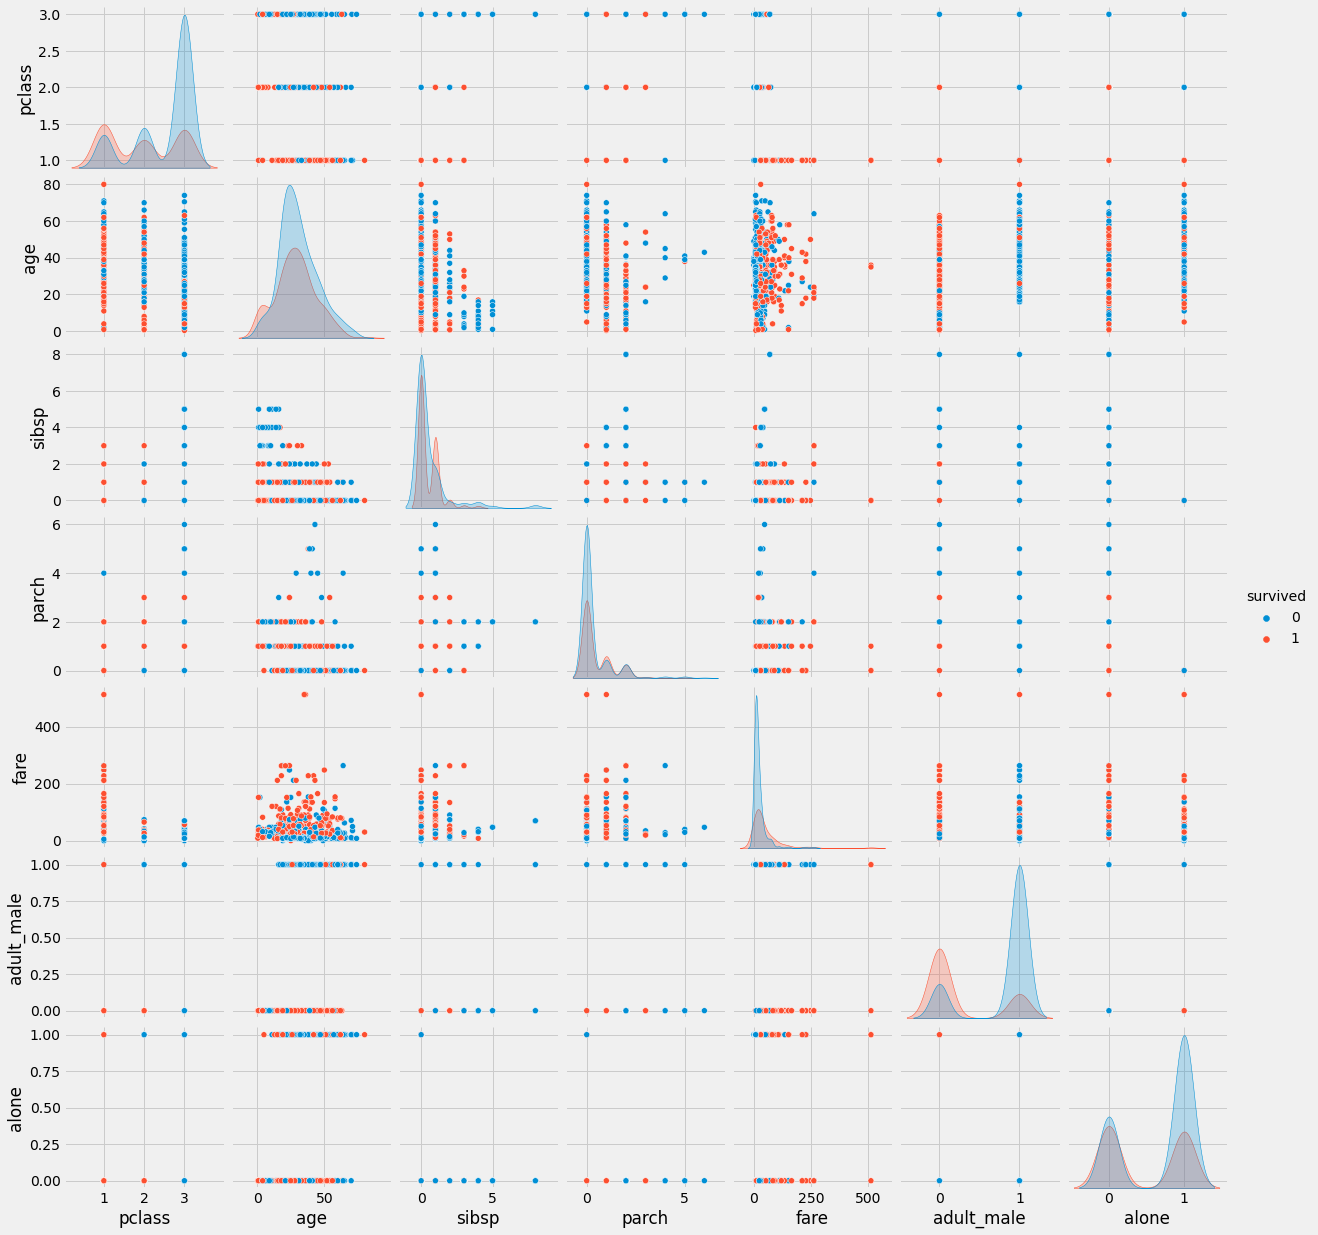

In [25]:
sns.pairplot(data=titanic, hue='survived');

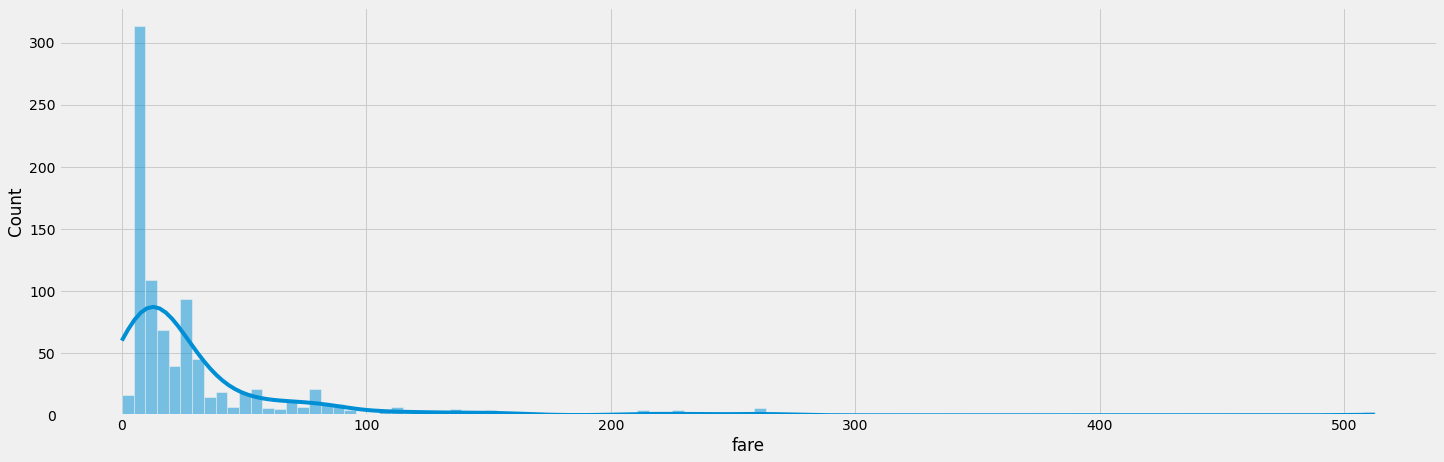

In [26]:
sns.histplot(titanic['fare'], kde=True); #pareto dist, we'll use boxcox transformation

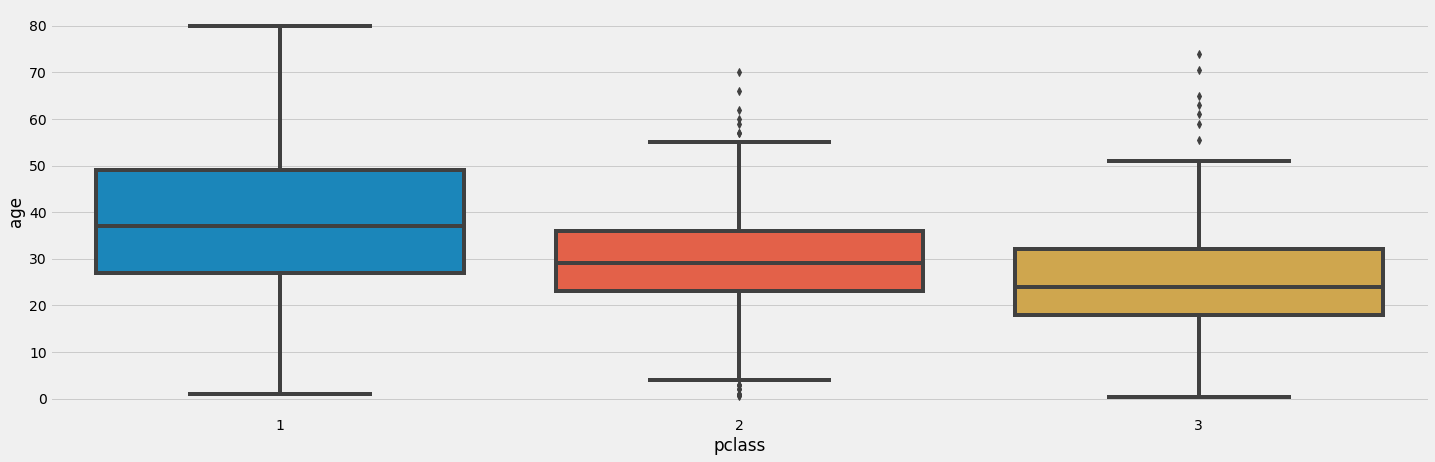

In [27]:
sns.boxplot(x='pclass', y='age', data=titanic);